![nama.png](nama.png)


# Pendeteksi Volume Air Secara Otomatis Menggunakan Fuzzy

### Abstrak
Ketersediaan air di suatu gedung atau bangunan masih sulit untuk dipantau, karena cara yang digunakan masih mengandalkan manusia. Membantu dalam memdeteksi volume air secara efektif pada bak penampungan air menggunakan sensor ultrasonic hc-sr04 dan fuzzy logic. Ketersediaan air di suatu gedung atau bangunan dipantau saat air pada penampungan telah habis.Hal ini tidak baik karena ketersediaan air sangat perlu dan harus mencukupi kebutuhan gedung secara terus-menerus.Selama ini, pemantauan volume penampungan air dilakukan secara visual.Seseorang hanya melihat isi penampungan air tersebut dari bagian atas saja, sehingga informasi yang didapat tidak akurat.Selain itu, wadah penampungan umumnya tidak tembus pandang.Sehingga sulit untuk dilakukan pemantauan volume tanki air. Pada perancangan alat ini system mampu bekerja secara akurat dengan input tinggi air dan keluaran air kran menggunakan sensor water flow serta pengujian dapat menentukan tingkat pengisian yang dilihat dari rule-rule yang dirancang.Hasil dari pendeteksian sensor ultrasonic terdapat tiga tanda led indicator,led biru menandakan bahwa volume air didalam water tank sudah penuh,led kuning membertahu bahwa water tank sebagian terisi dan led warna merah memberitahukan bahwa volume air didalam water tank sudah habis dan segera diisi kembali. Dari hasil pengujian ini,dapat diambil kesimpulan dalam penentuan status tingkat.

### Input
Tinggi Air
 - **Sedikit:** 1 - 11 cm
 - **Setengah:** 6 - 16 cm
 - **Penuh:** 11 - 22 cm
 
Air Kran
 - **Sedikit:** 1 - 50 ml
 - **Sedang:** 30 - 70 ml
 - **Normal:** 50 - 100 ml
 
### Output
Kecepatan
 - **Lambat:** 1 - 100 m/s
 - **Normal:** 60 - 140 m/s
 - **Cepat:** 100 - 200 m/s
 
Selanjutnya, akan diterjemahkan menggunakan program sebagai berikut:

### Mengimpor library untuk fuzzy
Beberapa library yang digunakan itu adalah _matplotlib.pyplot_ , _numpy_ dan _skfuzzy_. Kita juga mengambil fungsi _control_ dari library _skfuzzy_.

In [122]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl


# Fuzzyfikasi
### Menentukan variabel dan semesta pembicaraan

Pada langkah ini, setiap variabel input dan output akan ditentukan nilai semesta pembicaraannya atau penentuan batas nilai dari masing-masing variabel. Karena setiap variabel yang akan digunakan oleh proses fuzzy akan memiliki nilai numerik, dan memiliki batas awal dan batas akhir (crisp).

In [123]:
tinggi = ctrl.Antecedent(np.arange(1, 22, 1), 'tinggi air')
kran = ctrl.Antecedent(np.arange(1, 100, 1), 'air kran')
kecepatan = ctrl.Consequent(np.arange(1, 200, 1), 'tingkat pengisian')

# Untuk Plot Terpisah
tinggi1 = np.arange(1, 22, 1)
kran1 = np.arange(1, 100, 1)
kecepatan1 = np.arange(1, 200, 1)

Penggunaan `antecedent` adalah premis atau sebagai inputnya, dan `consequent` sebagai kesimpulan atau outputnya. Dan angka-angka di dalam kurung tersebut adalah batas-batasnya yang formatnya adalah _**(batas awal, batas akhir, kelipatan)**_. Lalu diberikan label dengan nama variabelnya.

### Menentukan Himpunan Fuzzy
Selanjutnya, ketika sudah menentukan semesta pembicaraan atau crisp dari masing-masing variabel dalam bentuk numerik, dilanjutkan dengan membuat himpunan fuzzy yang direpresentasikan dalam variabel linguistik. Setiap variabel linguistik tersebut akan memiliki domain atau range dari minimal ke maksimal. Berikut dibentuk dalam tabel:
![fz1.png](fz1.png)

#### Fungsi Keanggotaan Variabel Tinggi Air

In [124]:
tinggi['sedikit'] = fuzz.trapmf(tinggi.universe, [1, 1, 5, 11])
tinggi['setengah'] = fuzz.trimf(tinggi.universe, [6, 11, 16])
tinggi['penuh'] = fuzz.trapmf(tinggi.universe, [11, 20, 22, 22])

#Untuk plot terpisah
tinggi1_sedikit = fuzz.trapmf(tinggi1, [1, 1, 5, 11])
tinggi1_setengah = fuzz.trimf(tinggi1, [6, 11, 16])
tinggi1_penuh= fuzz.trapmf(tinggi1, [11, 20, 22, 22])


#### Fungsi Keanggotaan Variabel Air Kran

In [125]:
kran['sedikit'] = fuzz.trapmf(kran.universe, [1, 1, 10, 50])
kran['sedang'] = fuzz.trimf(kran.universe, [30, 50, 70])
kran['banyak'] = fuzz.trapmf(kran.universe, [50, 85, 100, 100])

#Untuk plot terpisah
kran1_sedikit = fuzz.trapmf(kran1, [1, 1, 10, 50])
kran1_sedang = fuzz.trimf(kran1, [30, 50, 70])
kran1_banyak= fuzz.trapmf(kran1, [50, 85, 100, 100])

#### Fungsi Keanggotaan Variabel Tingkat Pengisian Air

In [126]:
kecepatan['lambat'] = fuzz.trapmf(kecepatan.universe, [1, 1, 20, 100])
kecepatan['normal'] = fuzz.trimf(kecepatan.universe, [60, 100, 140])
kecepatan['cepat'] = fuzz.trapmf(kecepatan.universe, [100, 175, 200, 200])

#Untuk plot terpisah
kecepatan1_lambat = fuzz.trapmf(kecepatan1, [1, 1, 20, 100])
kecepatan1_normal = fuzz.trimf(kecepatan1, [60, 100, 140])
kecepatan1_cepat= fuzz.trapmf(kecepatan1, [100, 175, 200, 200])

### Menampilkan Grafik Masing-Masing Himpunan Fuzzy

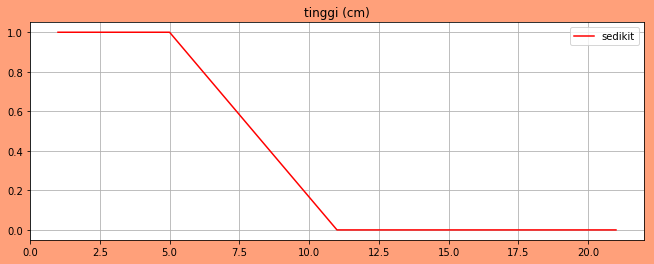

In [127]:
fig, (ax0) = plt.subplots(nrows=1, facecolor='lightsalmon', figsize=(11, 4))

ax0.plot(tinggi1,tinggi1_sedikit, 'red', linewidth=1.5, label='sedikit')
ax0.set_title('tinggi (cm)')
ax0.grid()
ax0.legend()

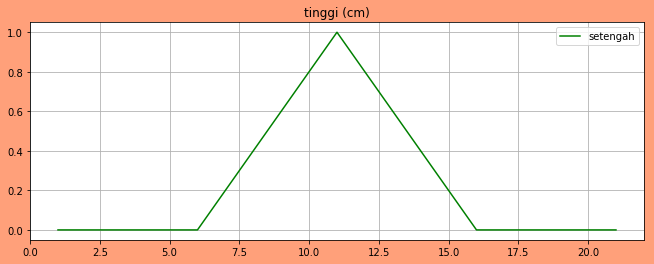

In [128]:
fig, (ax0) = plt.subplots(nrows=1, facecolor='lightsalmon', figsize=(11, 4))

ax0.plot(tinggi1,tinggi1_setengah, 'green', linewidth=1.5, label='setengah')
ax0.set_title('tinggi (cm)')
ax0.grid()
ax0.legend()


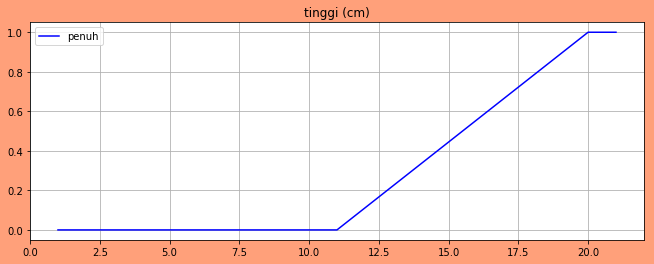

In [129]:
fig, (ax0) = plt.subplots(nrows=1, facecolor='lightsalmon', figsize=(11, 4))

ax0.plot(tinggi1,tinggi1_penuh, 'blue', linewidth=1.5, label='penuh')
ax0.set_title('tinggi (cm)')
ax0.grid()
ax0.legend()


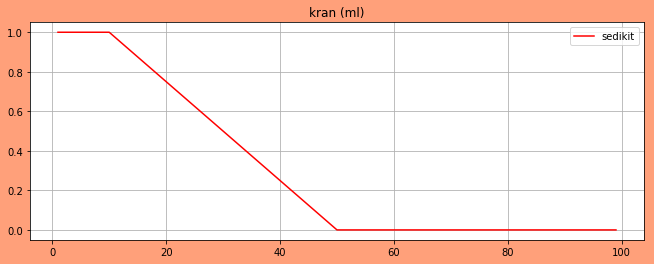

In [130]:
fig, (ax0) = plt.subplots(nrows=1, facecolor='lightsalmon', figsize=(11, 4))

ax0.plot(kran1,kran1_sedikit, 'red', linewidth=1.5, label='sedikit')
ax0.set_title('kran (ml)')
ax0.grid()
ax0.legend()

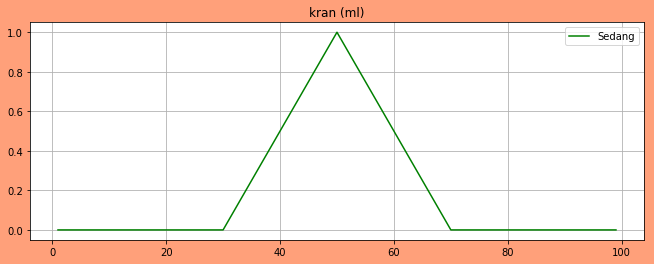

In [131]:
fig, (ax0) = plt.subplots(nrows=1, facecolor='lightsalmon', figsize=(11, 4))

ax0.plot(kran1,kran1_sedang, 'green', linewidth=1.5, label='Sedang')
ax0.set_title('kran (ml)')
ax0.grid()
ax0.legend()

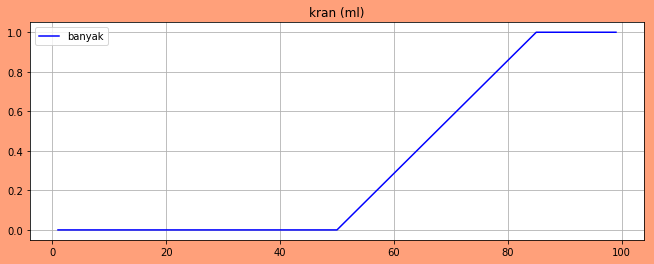

In [132]:
fig, (ax0) = plt.subplots(nrows=1, facecolor='lightsalmon', figsize=(11, 4))

ax0.plot(kran1,kran1_banyak, 'blue', linewidth=1.5, label='banyak')
ax0.set_title('kran (ml)')
ax0.grid()
ax0.legend()

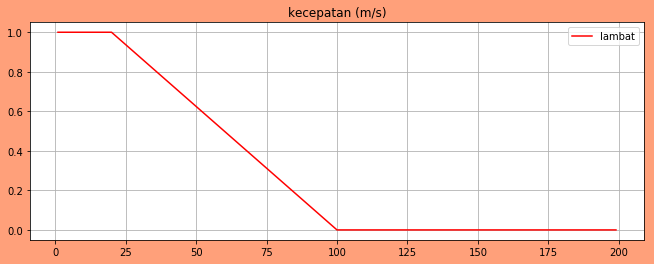

In [133]:
fig, (ax0) = plt.subplots(nrows=1, facecolor='lightsalmon', figsize=(11, 4))

ax0.plot(kecepatan1,kecepatan1_lambat, 'red', linewidth=1.5, label='lambat')
ax0.set_title('kecepatan (m/s)')
ax0.grid()
ax0.legend()

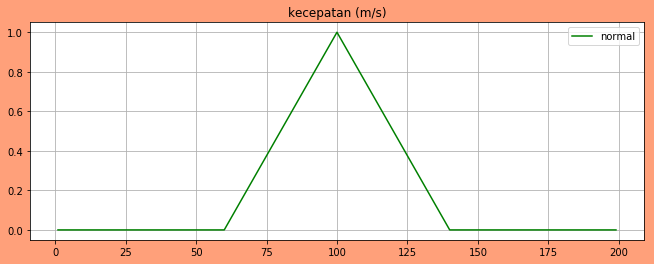

In [134]:
fig, (ax0) = plt.subplots(nrows=1, facecolor='lightsalmon', figsize=(11, 4))

ax0.plot(kecepatan1,kecepatan1_normal, 'green', linewidth=1.5, label='normal')
ax0.set_title('kecepatan (m/s)')
ax0.grid()
ax0.legend()

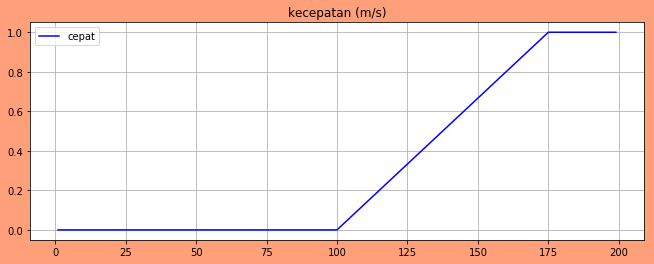

In [135]:
fig, (ax0) = plt.subplots(nrows=1, facecolor='lightsalmon', figsize=(11, 4))

ax0.plot(kecepatan1,kecepatan1_cepat, 'blue', linewidth=1.5, label='cepat')
ax0.set_title('kecepatan (m/s)')
ax0.grid()
ax0.legend()

### Menampilkan Grafik Fungsi Keanggotaan

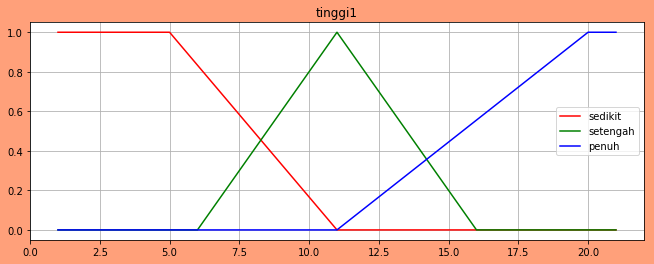

In [136]:
fig, (ax0) = plt.subplots(nrows=1, facecolor='lightsalmon', figsize=(11, 4))

ax0.plot(tinggi1,tinggi1_sedikit, 'red', linewidth=1.5, label='sedikit')
ax0.plot(tinggi1,tinggi1_setengah, 'green', linewidth=1.5, label='setengah')
ax0.plot(tinggi1,tinggi1_penuh, 'blue', linewidth=1.5, label='penuh')
ax0.set_title('tinggi1')
ax0.grid()
ax0.legend()

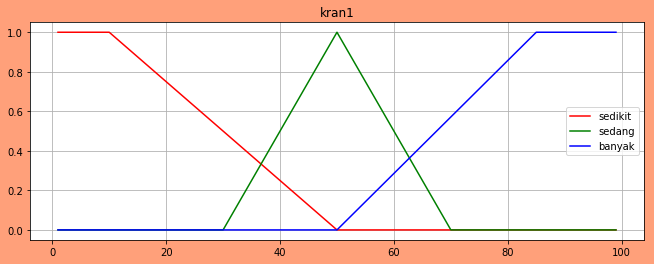

In [137]:
fig, (ax0) = plt.subplots(nrows=1, facecolor='lightsalmon', figsize=(11, 4))

ax0.plot(kran1,kran1_sedikit, 'red', linewidth=1.5, label='sedikit')
ax0.plot(kran1,kran1_sedang, 'green', linewidth=1.5, label='sedang')
ax0.plot(kran1,kran1_banyak, 'blue', linewidth=1.5, label='banyak')
ax0.set_title('kran1')
ax0.grid()
ax0.legend()

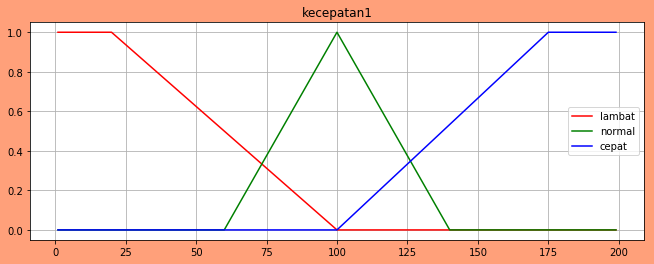

In [138]:
fig, (ax0) = plt.subplots(nrows=1, facecolor='lightsalmon', figsize=(11, 4))

ax0.plot(kecepatan1,kecepatan1_lambat, 'red', linewidth=1.5, label='lambat')
ax0.plot(kecepatan1,kecepatan1_normal, 'green', linewidth=1.5, label='normal')
ax0.plot(kecepatan1,kecepatan1_cepat, 'blue', linewidth=1.5, label='cepat')
ax0.set_title('kecepatan1')
ax0.grid()
ax0.legend()

### Penentuan Rule Based


In [139]:
rule1 = ctrl.Rule(tinggi['sedikit'] & kran['sedikit'], kecepatan['lambat'])
rule2 = ctrl.Rule(tinggi['sedikit'] & kran['sedang'], kecepatan['normal'])
rule3 = ctrl.Rule(tinggi['sedikit'] & kran['banyak'], kecepatan['cepat'])
rule4 = ctrl.Rule(tinggi['setengah'] & kran['sedikit'], kecepatan['lambat'])
rule5 = ctrl.Rule(tinggi['setengah'] & kran['sedang'], kecepatan['normal'])
rule6 = ctrl.Rule(tinggi['setengah'] & kran['banyak'], kecepatan['cepat'])
rule7 = ctrl.Rule(tinggi['penuh'] & kran['sedikit'], kecepatan['lambat'])
rule8 = ctrl.Rule(tinggi['penuh'] & kran['sedang'], kecepatan['normal'])
rule9 = ctrl.Rule(tinggi['penuh'] & kran['banyak'], kecepatan['cepat'])

### Menggabungan semua rule untuk dijadikan sebagai control system

In [140]:
Kecepatan_ctrl= ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])

### Menggunakan mode simulasi